.

# Project: Investigate a Dataset - European soccer - Project

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
### Dataset Description
![Database Diagram](db_diagram.png)

From 2008 to 2016, this soccer dataset comes from kaggle and contains data from a large number of teams, players and matches from different leagues of many european countries. these datasets contain seven tables called: 'Country','League','Match','Player','Player Attributes','Team','Team Attributes'. and also have information about every player and team within each league.

### Questions for Analysis
We will discuss just 7 questions about these dataset in order to get useful insights beyond it.
1. Which players had the most penalties?
2. How is the relation between height of the player and his head_accuracy? and is height aquired by the teams?
3. Which kind of player attributes are the most important to team's success ?
4. What is the best age of a player ?
5. In English Premier League, which team have strongest attack(scores) ?
6. In English Premier League, which team got most points ?
7. Which season in English Premier League has the most goals ?


In [22]:
# import
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [20]:
# connect and load database
db_file = 'database.sqlite'
conn = sqlite3.connect(db_file)

In [21]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_ctry = pd.read_sql("SELECT * FROM Country", conn, index_col = 'id')
df_lge = pd.read_sql("SELECT * FROM League", conn, index_col = 'id')
df_mtch = pd.read_sql("SELECT * FROM Match", conn, index_col = 'id')
df_plyr = pd.read_sql("SELECT * FROM Player", conn, index_col = 'id')
df_plyr_att = pd.read_sql("SELECT * FROM Player_Attributes", conn, index_col = 'id')
df_tm = pd.read_sql("SELECT * FROM TEAM", conn)
df_tm_att = pd.read_sql("SELECT * FROM Team_Attributes", conn, index_col = 'id')




In [23]:
# remove outlier.
def remove_outlier(_df, col_name):
    """
    remove outliers
    """
    q1 = _df[col_name].quantile(0.25)
    q3 = _df[col_name].quantile(0.75)
    iqr = q3-q1
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = _df.loc[(_df[col_name] > fence_low) & (_df[col_name] < fence_high)]
    return df_out

In [24]:
def eleven_player_columns(is_home=True):
    """
    get 11 players column name of match
    :param is_home:
    :return:
    """
    prefix = 'home_player_' if is_home else 'away_player_'
    return [f'{prefix}{i}' for i in range(1, 12)]

In [25]:
# function to get a glance into the dataset depending on the selected table

def get_info(df):
    print('A Resume of the table')
    print('-------------')
    print(df.head())
    print('Dimension of the table')
    print('-------------')
    print(df.shape)
    print('Columns of the table')
    print('-------------')
    print(df.columns)
    print('Duplicated rows or not')
    print('-------------')
    print(df.duplicated().sum())
    print('Null values or not')
    print('-------------')
    print(df.isnull().sum())
          
    


In [11]:
#Here with **Country Table**, it has a lot of missing values about important info on players
get_info(df_ctry)

A Resume of the table
-------------
          name
id            
1      Belgium
1729   England
4769    France
7809   Germany
10257    Italy
Dimension of the table
-------------
(11, 1)
Columns of the table
-------------
Index(['name'], dtype='object')
Duplicated rows or not
-------------
0
Null values or not
-------------
name    0
dtype: int64


>Country table has 11 rows and 2 columns.



In [12]:
#Here with **Team Table**, it has a lot of missing values about important info on players
get_info(df_tm)


A Resume of the table
-------------
   id  team_api_id  team_fifa_api_id     team_long_name team_short_name
0   1         9987             673.0           KRC Genk             GEN
1   2         9993             675.0       Beerschot AC             BAC
2   3        10000           15005.0   SV Zulte-Waregem             ZUL
3   4         9994            2007.0   Sporting Lokeren             LOK
4   5         9984            1750.0  KSV Cercle Brugge             CEB
Dimension of the table
-------------
(299, 5)
Columns of the table
-------------
Index(['id', 'team_api_id', 'team_fifa_api_id', 'team_long_name',
       'team_short_name'],
      dtype='object')
Duplicated rows or not
-------------
0
Null values or not
-------------
id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64


> Team table has 299 rows and 5 columns.



In [13]:
#Here with **League Table**, it has a lot of missing values about important info on players
get_info(df_lge)



A Resume of the table
-------------
       country_id                    name
id                                       
1               1  Belgium Jupiler League
1729         1729  England Premier League
4769         4769          France Ligue 1
7809         7809   Germany 1. Bundesliga
10257       10257           Italy Serie A
Dimension of the table
-------------
(11, 2)
Columns of the table
-------------
Index(['country_id', 'name'], dtype='object')
Duplicated rows or not
-------------
0
Null values or not
-------------
country_id    0
name          0
dtype: int64


>League table has no empty cells and it contains 11 rows, 3 columns.



In [14]:
#Here with **Match Table**, it has a lot of missing values about important info on players
get_info(df_mtch)


A Resume of the table
-------------
    country_id  league_id     season  stage                 date  \
id                                                                 
1            1          1  2008/2009      1  2008-08-17 00:00:00   
2            1          1  2008/2009      1  2008-08-16 00:00:00   
3            1          1  2008/2009      1  2008-08-16 00:00:00   
4            1          1  2008/2009      1  2008-08-17 00:00:00   
5            1          1  2008/2009      1  2008-08-16 00:00:00   

    match_api_id  home_team_api_id  away_team_api_id  home_team_goal  \
id                                                                     
1         492473              9987              9993               1   
2         492474             10000              9994               0   
3         492475              9984              8635               0   
4         492476              9991              9998               5   
5         492477              7947              9985   

>Match table contains 25979 rows and 115 columns.



In [15]:
#Here with **Player Table**, it has a lot of missing values about important info on players
get_info(df_plyr)



A Resume of the table
-------------
    player_api_id         player_name  player_fifa_api_id  \
id                                                          
1          505942  Aaron Appindangoye              218353   
2          155782     Aaron Cresswell              189615   
3          162549         Aaron Doran              186170   
4           30572       Aaron Galindo              140161   
5           23780        Aaron Hughes               17725   

               birthday  height  weight  
id                                       
1   1992-02-29 00:00:00  182.88     187  
2   1989-12-15 00:00:00  170.18     146  
3   1991-05-13 00:00:00  170.18     163  
4   1982-05-08 00:00:00  182.88     198  
5   1979-11-08 00:00:00  182.88     154  
Dimension of the table
-------------
(11060, 6)
Columns of the table
-------------
Index(['player_api_id', 'player_name', 'player_fifa_api_id', 'birthday',
       'height', 'weight'],
      dtype='object')
Duplicated rows or not
-------------

>Players table has 11060 row and 7 columns.



In [16]:
#Here with **Player attribute Table**, it has a lot of missing values about important info on players
get_info(df_plyr_att)

A Resume of the table
-------------
    player_fifa_api_id  player_api_id                 date  overall_rating  \
id                                                                           
1               218353         505942  2016-02-18 00:00:00            67.0   
2               218353         505942  2015-11-19 00:00:00            67.0   
3               218353         505942  2015-09-21 00:00:00            62.0   
4               218353         505942  2015-03-20 00:00:00            61.0   
5               218353         505942  2007-02-22 00:00:00            61.0   

    potential preferred_foot attacking_work_rate defensive_work_rate  \
id                                                                     
1        71.0          right              medium              medium   
2        71.0          right              medium              medium   
3        66.0          right              medium              medium   
4        65.0          right              medium         

>Player attributes table shows details about every player that playeyd in the soccer game. The table contains 183978 rows and 42 columns.



### Player Table 
 we want to merge player_table and player_attributes together to make it easy for accessing by name

In [28]:
#combibing both datasets into just one
players = df_plyr.merge(df_plyr_att, on=['player_api_id','player_fifa_api_id'], how = "inner")

# A sample of the new dataset
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183766 entries, 0 to 183765
Data columns (total 45 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_api_id        183766 non-null  int64  
 1   player_name          183766 non-null  object 
 2   player_fifa_api_id   183766 non-null  int64  
 3   birthday             183766 non-null  object 
 4   height               183766 non-null  float64
 5   weight               183766 non-null  int64  
 6   date                 183766 non-null  object 
 7   overall_rating       183016 non-null  float64
 8   potential            183016 non-null  float64
 9   preferred_foot       183016 non-null  object 
 10  attacking_work_rate  180622 non-null  object 
 11  defensive_work_rate  183016 non-null  object 
 12  crossing             183016 non-null  float64
 13  finishing            183016 non-null  float64
 14  heading_accuracy     183016 non-null  float64
 15  short_passing    

### Data Cleaning
We will use this dataset then which is called **pnlt** (penalties) in our EDA process 


In [29]:
#generate a subset for question 1
pnlt = players[["player_name","penalties"]]

#dropping duplicated values
pnlt = pnlt.drop_duplicates()

#dropping missing values
pnlt = pnlt.dropna()

#converting floating numbers into ints to be more consistent
pnlt.penalties = pnlt.penalties.astype(int)

# A sample of our new subset
pnlt.head()








,player_name,penalties
0,Aaron Appindangoye,48
3,Aaron Appindangoye,47
5,Aaron Cresswell,59
13,Aaron Cresswell,58
32,Aaron Cresswell,35


In [30]:
#generating a subset for question 2
height = pd.DataFrame(df_plyr[["player_name","height"]])

#inserting the heading_rating into our subset
height.insert( column='heading',value=players.heading_accuracy,loc=2)

#removing any missing values
height = height.dropna()

#removing any duplicated data
height = height.drop_duplicates()

#converting the floats into ints to be more clear .. the float parts don't matter here like in **height**
height.height = height.height.astype(int)
height.heading = height.heading.astype(int)

# A sample of our new subset
height.head()

,player_name,height,heading
id,,,
1,Aaron Appindangoye,182,71
2,Aaron Cresswell,170,71
3,Aaron Doran,170,70
4,Aaron Galindo,182,70
5,Aaron Hughes,182,58


In [31]:

#showing the names of columns in our new dataset of players 
players.dtypes

player_api_id            int64
player_name             object
player_fifa_api_id       int64
birthday                object
height                 float64
weight                   int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggressi

### question 1: Which players had the most penalties?

In [34]:
# ordering the players as having most penalties
most_pnlt = pnlt.groupby(['player_name'])['penalties'].max().sort_values(ascending=False)
#showing first 15 players
top_class = pd.DataFrame(most_pnlt[:15])
top_class

,penalties
player_name,
Rickie Lambert,96
Andrea Pirlo,95
Xavi Hernandez,95
Mario Balotelli,95
Paul Scholes,95
Adrian Mutu,94
Iker Casillas,94
Cesc Fabregas,94
Roy Makaay,94


The above table shows the result for players that had the most penalties.

From the result, ***Rickie Lambert*** had the most penalties.

Text(0.5, 1.0, 'Penalties Scored by Players')

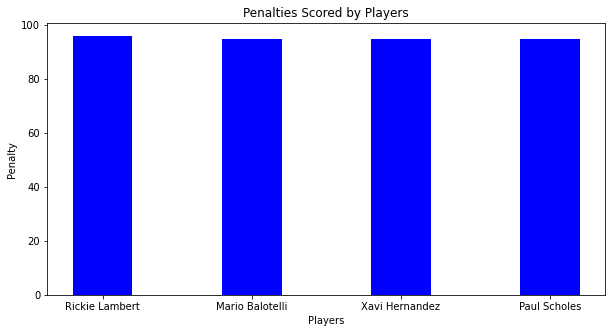

In [56]:
fig = plt.figure(figsize = (10, 5))
player_penalties_plt = pnlt.sort_values("penalties", axis = 0, ascending = False).head()

plt.bar(player_penalties_plt['player_name'], player_penalties_plt['penalties'], color = 'blue', width = 0.4)
plt.xlabel("Players")
plt.ylabel("Penalty")
plt.title("Penalties Scored by Players")

>The barplot is used to visualize the players with the highest goal because it estimates key values at a glance.

### question2: How is the relation between height of the player and his head_accuracy?

In [33]:
height.head()

,player_name,height,heading
id,,,
1,Aaron Appindangoye,182,71
2,Aaron Cresswell,170,71
3,Aaron Doran,170,70
4,Aaron Galindo,182,70
5,Aaron Hughes,182,58


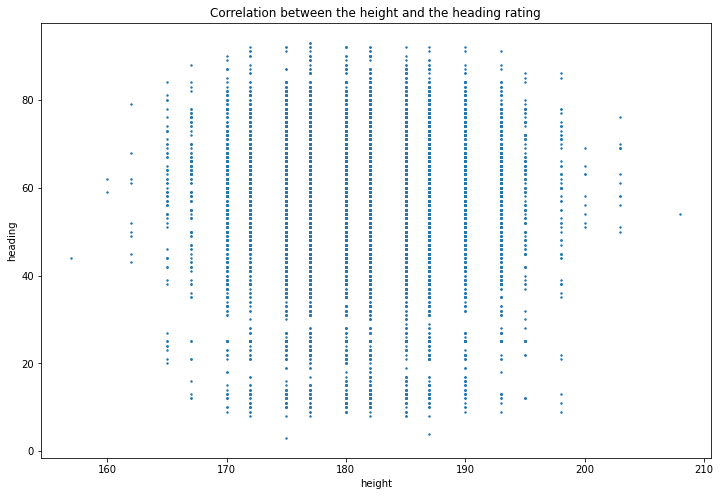

In [35]:
# showing the relation between the heading and height of the player
height.plot.scatter(x= 'height', y= 'heading', title = 'Correlation between the height and the heading rating', figsize=(12,8), s=2);


Here, we have our dataset of **heading** label
>There is no correlation between the heading and the height of the players which means that its not necessary for being good-header

Text(0.5, 1.0, 'distribution of heights of the players in teams')

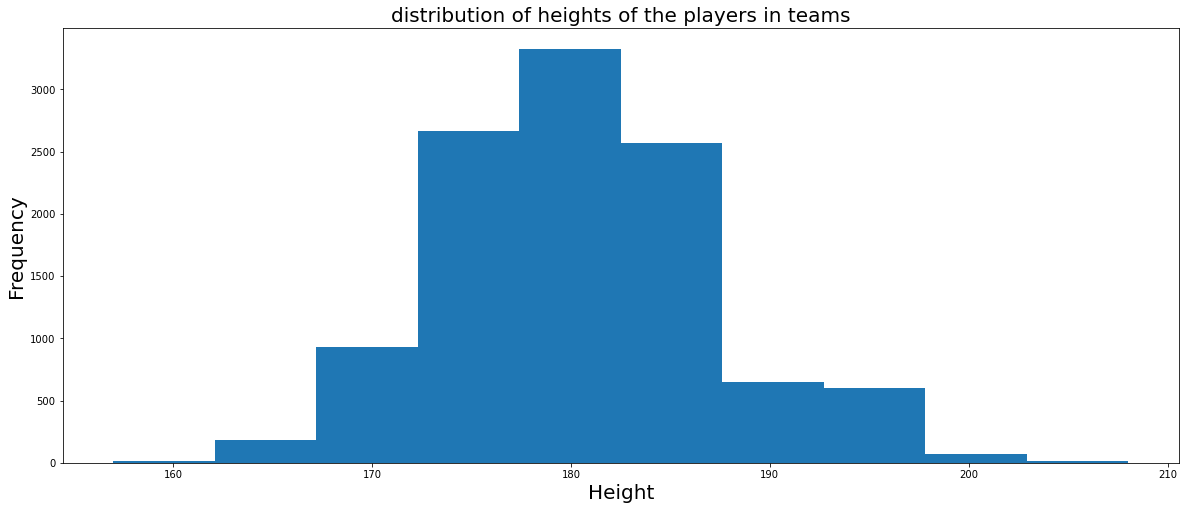

In [36]:
height.height.plot(kind='hist', figsize=(20,8));
plt.ylabel('Frequency', size = 20)
plt.xlabel('Height', size = 20)
plt.title('distribution of heights of the players in teams', size=20)

WOW!! its **Normal Distribution** 

### **Home and away column**

In [37]:
# home & away columns
home_players = eleven_player_columns()
away_players = eleven_player_columns(False)

In [38]:
# get all matches of England Premier League ( because Arsenal plays in this league )
df_match = pd.read_sql(
    f"SELECT season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,{','.join(home_players)},{','.join(away_players)} FROM League JOIN Match M ON League.id = M.league_id WHERE name = 'England Premier League';",
    conn)
df_match.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            3040 non-null   object 
 1   home_team_api_id  3040 non-null   int64  
 2   away_team_api_id  3040 non-null   int64  
 3   home_team_goal    3040 non-null   int64  
 4   away_team_goal    3040 non-null   int64  
 5   home_player_1     3040 non-null   int64  
 6   home_player_2     3033 non-null   float64
 7   home_player_3     3040 non-null   int64  
 8   home_player_4     3040 non-null   int64  
 9   home_player_5     3037 non-null   float64
 10  home_player_6     3040 non-null   int64  
 11  home_player_7     3035 non-null   float64
 12  home_player_8     3033 non-null   float64
 13  home_player_9     3038 non-null   float64
 14  home_player_10    3033 non-null   float64
 15  home_player_11    3039 non-null   float64
 16  away_player_1     3040 non-null   int64  


In [57]:
# look at data
df_match.head()

,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,...,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,season_start_year,home_team_point,away_team_point
0,2008/2009,10260,10261,1,1,30726,30362.0,30620,30865,32569.0,...,29581.0,38807.0,40565.0,30360.0,33852.0,34574.0,37799.0,2008,1,1
1,2008/2009,9825,8659,1,0,23686,26111.0,38835,30986,31291.0,...,24728.0,24664.0,31088.0,23257.0,24171.0,25922.0,27267.0,2008,3,0
2,2008/2009,8472,8650,0,1,32562,38836.0,24446,24408,36786.0,...,414792.0,37139.0,30618.0,40701.0,24800.0,24635.0,30853.0,2008,0,3
3,2008/2009,8654,8528,2,1,36374,30966.0,23818,37277,30687.0,...,25005.0,35327.0,25150.0,97988.0,41877.0,127857.0,34466.0,2008,3,0
4,2008/2009,10252,8456,4,2,30380,30357.0,24658,43280,23282.0,...,33963.0,47413.0,40198.0,42119.0,NaN,33633.0,107216.0,2008,3,0


In [59]:
# convert season to integer number , so I can easier to join with player data later
df_match['season_start_year'] = df_match.season.str[:4].astype(int)
df_match.head()

,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,...,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,season_start_year,home_team_point,away_team_point
0,2008/2009,10260,10261,1,1,30726,30362.0,30620,30865,32569.0,...,29581.0,38807.0,40565.0,30360.0,33852.0,34574.0,37799.0,2008,1,1
1,2008/2009,9825,8659,1,0,23686,26111.0,38835,30986,31291.0,...,24728.0,24664.0,31088.0,23257.0,24171.0,25922.0,27267.0,2008,3,0
2,2008/2009,8472,8650,0,1,32562,38836.0,24446,24408,36786.0,...,414792.0,37139.0,30618.0,40701.0,24800.0,24635.0,30853.0,2008,0,3
3,2008/2009,8654,8528,2,1,36374,30966.0,23818,37277,30687.0,...,25005.0,35327.0,25150.0,97988.0,41877.0,127857.0,34466.0,2008,3,0
4,2008/2009,10252,8456,4,2,30380,30357.0,24658,43280,23282.0,...,33963.0,47413.0,40198.0,42119.0,NaN,33633.0,107216.0,2008,3,0


In [41]:
# calculate points for match
# win : 3 points , draw : 1 points , lose: 0 points
df_match['home_team_point'] = np.select([df_match.home_team_goal > df_match.away_team_goal, df_match.home_team_goal == df_match.away_team_goal], [3, 1], 0)
df_match['away_team_point'] = np.select([df_match.away_team_goal > df_match.home_team_goal, df_match.away_team_goal == df_match.home_team_goal], [3, 1], 0)
df_match[['home_team_goal', 'away_team_goal', 'home_team_point', 'away_team_point']].head(20)

,home_team_goal,away_team_goal,home_team_point,away_team_point
0,1,1,1,1
1,1,0,3,0
2,0,1,0,3
3,2,1,3,0
4,4,2,3,0
5,2,3,0,3
6,2,1,3,0
7,3,1,3,0
8,2,1,3,0
9,4,0,3,0


In [60]:
# goals per team, season
df_home_goal = df_match.groupby(['home_team_api_id', 'season_start_year']).home_team_goal.sum()
df_away_goal = df_match.groupby(['away_team_api_id', 'season_start_year']).away_team_goal.sum()

In [61]:
# points per season , matches count per season
df_home_point = df_match.groupby(['home_team_api_id', 'season_start_year']).home_team_point.agg(['sum', 'count'])
df_away_point = df_match.groupby(['away_team_api_id', 'season_start_year']).away_team_point.agg(['sum', 'count'])

In [62]:
df_away_point.head()

sum  count
away_team_api_id season_start_year            
8191             2009                 4     19
                 2014                14     19
8197             2014                15     19
                 2015                39     19
8344             2013                10     19

In [63]:
df_home_point.head()

sum  count
home_team_api_id season_start_year            
8191             2009                26     19
                 2014                19     19
8197             2014                26     19
                 2015                42     19
8344             2013                20     19

In [64]:
# merge points (home matches + away matches)
df_point = df_home_point + df_away_point
df_point.head()

sum  count
home_team_api_id season_start_year            
8191             2009                30     38
                 2014                33     38
8197             2014                41     38
                 2015                81     38
8344             2013                30     38

In [65]:
# merge goals (home matches + away matches)
df_goal = df_home_goal + df_away_goal
df_goal = df_goal.reset_index().rename(columns={'home_team_api_id':'team_api_id',0:'goal'})
df_goal.head()

,team_api_id,season_start_year,goal
0,8191,2009,42
1,8191,2014,28
2,8197,2014,46
3,8197,2015,68
4,8344,2013,32


In [66]:
# rank team per season
df_point['rank'] = df_point.groupby('season_start_year')['sum'].rank('dense', ascending=False)
df_point['rank'] = df_point['rank'].astype(int)
df_point.sort_values(['season_start_year', 'rank'], ascending=[True, True], inplace=True)
df_point.head()

,,sum,count,rank
home_team_api_id,season_start_year,,,
10260,2008,90,38,1
8650,2008,86,38,2
8455,2008,83,38,3
9825,2008,72,38,4
8668,2008,63,38,5


In [93]:
# check if all team have same 38 matches
df_point['count'].unique()

array([38])

In [94]:
# join team name with team result
df_rank = pd.merge(df_point.reset_index(), df_tm, left_on='home_team_api_id', right_on='team_api_id')
df_rank = df_rank.drop(['home_team_api_id', 'count', 'id', 'team_fifa_api_id'], axis=1).rename(columns={'sum': 'points'})
df_rank.head()

,season_start_year,points,rank,team_api_id,team_long_name,team_short_name
0,2008,90,1,10260,Manchester United,MUN
1,2009,85,2,10260,Manchester United,MUN
2,2010,80,1,10260,Manchester United,MUN
3,2011,89,1,10260,Manchester United,MUN
4,2012,89,1,10260,Manchester United,MUN


In [91]:
# sort by season and rank
df_rank.sort_values(['season_start_year', 'rank'], ascending=[True, True])
df_rank.head()

,season_start_year,points,rank,team_api_id,team_long_name,team_short_name
0,2008,90,1,10260,Manchester United,MUN
1,2009,85,2,10260,Manchester United,MUN
2,2010,80,1,10260,Manchester United,MUN
3,2011,89,1,10260,Manchester United,MUN
4,2012,89,1,10260,Manchester United,MUN


### Player Attribute

In [70]:
df_plyr_att.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 1 to 183978
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_fifa_api_id   183978 non-null  int64  
 1   player_api_id        183978 non-null  int64  
 2   date                 183978 non-null  object 
 3   overall_rating       183142 non-null  float64
 4   potential            183142 non-null  float64
 5   preferred_foot       183142 non-null  object 
 6   attacking_work_rate  180748 non-null  object 
 7   defensive_work_rate  183142 non-null  object 
 8   crossing             183142 non-null  float64
 9   finishing            183142 non-null  float64
 10  heading_accuracy     183142 non-null  float64
 11  short_passing        183142 non-null  float64
 12  volleys              181265 non-null  float64
 13  dribbling            183142 non-null  float64
 14  curve                181265 non-null  float64
 15  free_kick_accurac

In [71]:
# fill missing object data
def print_col_unique(df, cols):
    for _col in cols:
        print(_col, df[_col].unique())

object_cols = ['preferred_foot','attacking_work_rate','defensive_work_rate']
print_col_unique(df_plyr_att,object_cols)

preferred_foot ['right' 'left' None]
attacking_work_rate ['medium' 'high' None 'low' 'None' 'le' 'norm' 'stoc' 'y']
defensive_work_rate ['medium' 'high' 'low' '_0' None '5' 'ean' 'o' '1' 'ormal' '7' '2' '8' '4'
 'tocky' '0' '3' '6' '9' 'es']


In [72]:
# convert object data to number
# high : 3 , medium : 2 , low 1, others : 2(medium)
# right : 2 , left : 2 , None: 2
for col in object_cols:
    df_plyr_att[col]= np.select([df_plyr_att[col] == 'high',df_plyr_att[col] == 'low'],[3,1],2)

print_col_unique(df_plyr_att,object_cols)

preferred_foot [2]
attacking_work_rate [2 3 1]
defensive_work_rate [2 3 1]


In [73]:
df_plyr_att.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 1 to 183978
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_fifa_api_id   183978 non-null  int64  
 1   player_api_id        183978 non-null  int64  
 2   date                 183978 non-null  object 
 3   overall_rating       183142 non-null  float64
 4   potential            183142 non-null  float64
 5   preferred_foot       183978 non-null  int64  
 6   attacking_work_rate  183978 non-null  int64  
 7   defensive_work_rate  183978 non-null  int64  
 8   crossing             183142 non-null  float64
 9   finishing            183142 non-null  float64
 10  heading_accuracy     183142 non-null  float64
 11  short_passing        183142 non-null  float64
 12  volleys              181265 non-null  float64
 13  dribbling            183142 non-null  float64
 14  curve                181265 non-null  float64
 15  free_kick_accurac

In [74]:
# date column is the day that player rated. but we can not relate this day with season.
# because almost season end in 30th May, so we use this day to find "season_start_year"
df_plyr_att.date = pd.to_datetime(df_plyr_att.date)
df_plyr_att['season_start_year'] = np.where(df_plyr_att.date.dt.month > 5, df_plyr_att.date.dt.year,
                                               df_plyr_att.date.dt.year - 1)
df_plyr_att.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 1 to 183978
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   player_fifa_api_id   183978 non-null  int64         
 1   player_api_id        183978 non-null  int64         
 2   date                 183978 non-null  datetime64[ns]
 3   overall_rating       183142 non-null  float64       
 4   potential            183142 non-null  float64       
 5   preferred_foot       183978 non-null  int64         
 6   attacking_work_rate  183978 non-null  int64         
 7   defensive_work_rate  183978 non-null  int64         
 8   crossing             183142 non-null  float64       
 9   finishing            183142 non-null  float64       
 10  heading_accuracy     183142 non-null  float64       
 11  short_passing        183142 non-null  float64       
 12  volleys              181265 non-null  float64       
 13  dribbling     

In [75]:
numerics = ['float16', 'float32', 'float64']
number_cols = df_plyr_att.select_dtypes(include=numerics).columns.tolist()
number_cols

['overall_rating',
 'potential',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes']

In [76]:
# fill missing data with mean
attr_cols = object_cols + number_cols
df_player_attr_mean = df_plyr_att.copy()
df_player_attr_mean[attr_cols] = df_plyr_att[attr_cols].fillna(df_plyr_att[attr_cols].mean())

# to make sure there are no missing value
df_player_attr_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 1 to 183978
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   player_fifa_api_id   183978 non-null  int64         
 1   player_api_id        183978 non-null  int64         
 2   date                 183978 non-null  datetime64[ns]
 3   overall_rating       183978 non-null  float64       
 4   potential            183978 non-null  float64       
 5   preferred_foot       183978 non-null  int64         
 6   attacking_work_rate  183978 non-null  int64         
 7   defensive_work_rate  183978 non-null  int64         
 8   crossing             183978 non-null  float64       
 9   finishing            183978 non-null  float64       
 10  heading_accuracy     183978 non-null  float64       
 11  short_passing        183978 non-null  float64       
 12  volleys              183978 non-null  float64       
 13  dribbling     

In [77]:
# calculate mean per season, player
df_player_attr_per_season = df_player_attr_mean.groupby(['player_api_id', 'season_start_year'], as_index=False)[attr_cols].mean()
df_player_attr_per_season.head(9)


,player_api_id,season_start_year,preferred_foot,attacking_work_rate,defensive_work_rate,overall_rating,potential,crossing,finishing,heading_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,2625,2006,2.0,3.0,2.0,63.0,64.0,48.000000,48.0,47.0,...,56.0,46.0,64.000000,66.0,63.000000,14.0,11.0,67.0,9.0,10.0
1,2625,2007,2.0,3.0,2.0,63.0,64.0,48.000000,48.0,47.0,...,56.0,46.0,64.000000,66.0,63.000000,14.0,24.0,67.0,24.0,24.0
2,2625,2008,2.0,3.0,2.0,60.0,64.0,48.000000,48.0,47.0,...,56.0,46.0,64.000000,66.0,63.000000,14.0,24.0,67.0,24.0,24.0
3,2625,2010,2.0,3.0,2.0,59.5,63.5,50.000000,47.5,46.5,...,55.5,67.5,63.500000,64.5,62.500000,12.0,11.0,6.0,8.0,8.0
4,2625,2011,2.0,2.5,2.0,58.0,58.0,52.000000,47.0,46.0,...,55.0,66.0,63.000000,63.0,52.000000,12.0,11.0,6.0,8.0,8.0
5,2625,2012,2.0,2.0,2.0,59.0,59.0,51.333333,47.0,46.0,...,55.0,66.0,62.666667,63.0,52.666667,12.0,11.0,6.0,8.0,8.0
6,2625,2013,2.0,2.0,2.0,61.0,61.0,50.000000,47.0,46.0,...,55.0,66.0,62.000000,63.0,54.000000,12.0,11.0,6.0,8.0,8.0
7,2625,2014,2.0,2.0,2.0,61.0,61.0,50.000000,47.0,46.0,...,55.0,66.0,62.000000,63.0,54.000000,12.0,11.0,6.0,8.0,8.0
8,2752,2006,2.0,2.0,2.0,62.0,68.0,36.000000,37.0,70.0,...,52.0,35.0,64.000000,60.0,65.000000,11.0,6.0,7.0,9.0,15.0


> we found that some year missing in player atrributes dataset (ex: 2009)
> we need to generate 2009 data from nearest year (2008 or 2010), so we can join data with rank dataset

### Get min max year of all datasets , we need to forward fill year for player attributes dataset , so we can join with rank dataset

In [95]:
# get min max year of match
df_match.season_start_year.agg(['min', 'max'])

min    2008
max    2015
Name: season_start_year, dtype: int64

In [96]:
# get min max year of player attributes
df_player_attr_per_season.season_start_year.agg(['min', 'max'])

min    2006
max    2016
Name: season_start_year, dtype: int64

In [97]:
# get min max year of team rank
df_rank.season_start_year.agg(['min', 'max'])

min    2008
max    2015
Name: season_start_year, dtype: int64

In [98]:
#  fill missing year from 2008 to 2015 for attribute , so we can join 1 vs 1 with team rank dataframe
df_player_attr_final = df_player_attr_per_season.set_index('season_start_year').groupby('player_api_id', as_index=False).apply(lambda x: x.reindex(range(2008, 2016), method='ffill')).reset_index().drop('level_0', axis=1)
#df_player_attr_final = df_player_attr_final.convert_dtypes()

# make sure there is no null data
df_player_attr_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88480 entries, 0 to 88479
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   season_start_year    88480 non-null  int64  
 1   player_api_id        88480 non-null  int64  
 2   preferred_foot       88480 non-null  float64
 3   attacking_work_rate  88480 non-null  float64
 4   defensive_work_rate  88480 non-null  float64
 5   overall_rating       88480 non-null  float64
 6   potential            88480 non-null  float64
 7   crossing             88480 non-null  float64
 8   finishing            88480 non-null  float64
 9   heading_accuracy     88480 non-null  float64
 10  short_passing        88480 non-null  float64
 11  volleys              88480 non-null  float64
 12  dribbling            88480 non-null  float64
 13  curve                88480 non-null  float64
 14  free_kick_accuracy   88480 non-null  float64
 15  long_passing         88480 non-null 

In [99]:
# check that we have all year data per player
df_player_attr_final.head(9)

,season_start_year,player_api_id,preferred_foot,attacking_work_rate,defensive_work_rate,overall_rating,potential,crossing,finishing,heading_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,2008,2625,2.0,3.0,2.0,60.0,64.0,48.000000,48.0,47.0,...,56.0,46.0,64.000000,66.0,63.000000,14.0,24.0,67.0,24.0,24.0
1,2009,2625,2.0,3.0,2.0,60.0,64.0,48.000000,48.0,47.0,...,56.0,46.0,64.000000,66.0,63.000000,14.0,24.0,67.0,24.0,24.0
2,2010,2625,2.0,3.0,2.0,59.5,63.5,50.000000,47.5,46.5,...,55.5,67.5,63.500000,64.5,62.500000,12.0,11.0,6.0,8.0,8.0
3,2011,2625,2.0,2.5,2.0,58.0,58.0,52.000000,47.0,46.0,...,55.0,66.0,63.000000,63.0,52.000000,12.0,11.0,6.0,8.0,8.0
4,2012,2625,2.0,2.0,2.0,59.0,59.0,51.333333,47.0,46.0,...,55.0,66.0,62.666667,63.0,52.666667,12.0,11.0,6.0,8.0,8.0
5,2013,2625,2.0,2.0,2.0,61.0,61.0,50.000000,47.0,46.0,...,55.0,66.0,62.000000,63.0,54.000000,12.0,11.0,6.0,8.0,8.0
6,2014,2625,2.0,2.0,2.0,61.0,61.0,50.000000,47.0,46.0,...,55.0,66.0,62.000000,63.0,54.000000,12.0,11.0,6.0,8.0,8.0
7,2015,2625,2.0,2.0,2.0,61.0,61.0,50.000000,47.0,46.0,...,55.0,66.0,62.000000,63.0,54.000000,12.0,11.0,6.0,8.0,8.0
8,2008,2752,2.0,2.0,2.0,65.0,68.0,36.000000,37.0,70.0,...,52.0,35.0,64.000000,60.0,65.000000,11.0,6.0,7.0,9.0,15.0


> all year from 2008 to 2015 was generated.

In [100]:
# get home players from match dataset
#df_match = df_match.convert_dtypes()
df_home_player = df_match.set_index(['season_start_year', 'home_team_api_id'])[home_players].stack().reset_index().rename(columns={'level_2': 'player_no', 0: 'player_api_id', 'home_team_api_id': 'team_api_id'})
df_home_player['player_api_id'] = df_home_player['player_api_id'].astype(int)
df_home_player.head()

,season_start_year,team_api_id,player_no,player_api_id
0,2008,10260,home_player_1,30726
1,2008,10260,home_player_2,30362
2,2008,10260,home_player_3,30620
3,2008,10260,home_player_4,30865
4,2008,10260,home_player_5,32569


In [102]:
# get away players from match dataset
df_away_player = df_match.set_index(['season_start_year', 'away_team_api_id'])[away_players].stack().reset_index().rename(columns={'level_2': 'player_no', 0: 'player_api_id', 'away_team_api_id': 'team_api_id'})
df_away_player['player_api_id'] = df_away_player['player_api_id'].astype(int)
df_away_player.head()

,season_start_year,team_api_id,player_no,player_api_id
0,2008,10261,away_player_1,24224
1,2008,10261,away_player_2,25518
2,2008,10261,away_player_3,24228
3,2008,10261,away_player_4,30929
4,2008,10261,away_player_5,29581


In [103]:
# merge home and away player together, so we have all player per year
df_player_final = pd.concat([df_home_player, df_away_player]).sort_values(['season_start_year', 'team_api_id', 'player_no']).drop('player_no', axis=1)
df_player_final.head()

,season_start_year,team_api_id,player_api_id
153,2008,8455,30859
393,2008,8455,30859
525,2008,8455,23984
843,2008,8455,30859
1019,2008,8455,30859


In [104]:
# join team and player attributes
df_match_player_attr = pd.merge(df_player_final, df_player_attr_final, on=['season_start_year', 'player_api_id'])
df_match_player_attr.head()

,season_start_year,team_api_id,player_api_id,preferred_foot,attacking_work_rate,defensive_work_rate,overall_rating,potential,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,2008,8455,30859,2.0,2.0,2.0,88.0,91.0,20.0,20.0,...,45.0,54.5,20.0,20.0,12.0,94.0,89.5,79.0,85.5,90.0
1,2008,8455,30859,2.0,2.0,2.0,88.0,91.0,20.0,20.0,...,45.0,54.5,20.0,20.0,12.0,94.0,89.5,79.0,85.5,90.0
2,2008,8455,30859,2.0,2.0,2.0,88.0,91.0,20.0,20.0,...,45.0,54.5,20.0,20.0,12.0,94.0,89.5,79.0,85.5,90.0
3,2008,8455,30859,2.0,2.0,2.0,88.0,91.0,20.0,20.0,...,45.0,54.5,20.0,20.0,12.0,94.0,89.5,79.0,85.5,90.0
4,2008,8455,30859,2.0,2.0,2.0,88.0,91.0,20.0,20.0,...,45.0,54.5,20.0,20.0,12.0,94.0,89.5,79.0,85.5,90.0


In [105]:
# join rank and player attributes
df_all = pd.merge(df_rank, df_match_player_attr, on=['season_start_year', 'team_api_id'])
df_all.head()

,season_start_year,points,rank,team_api_id,team_long_name,team_short_name,player_api_id,preferred_foot,attacking_work_rate,defensive_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,2008,90,1,10260,Manchester United,MUN,24157,2.0,3.0,1.0,...,60.0,59.0,22.0,28.5,30.0,12.0,22.0,31.0,22.0,22.0
1,2008,90,1,10260,Manchester United,MUN,30726,2.0,2.0,2.0,...,40.0,43.0,20.0,33.0,11.0,86.0,85.5,85.0,89.5,84.0
2,2008,90,1,10260,Manchester United,MUN,30726,2.0,2.0,2.0,...,40.0,43.0,20.0,33.0,11.0,86.0,85.5,85.0,89.5,84.0
3,2008,90,1,10260,Manchester United,MUN,30726,2.0,2.0,2.0,...,40.0,43.0,20.0,33.0,11.0,86.0,85.5,85.0,89.5,84.0
4,2008,90,1,10260,Manchester United,MUN,30726,2.0,2.0,2.0,...,40.0,43.0,20.0,33.0,11.0,86.0,85.5,85.0,89.5,84.0


In [106]:
# group by season and team , then calculate average attribute
df_all_mean = df_all.groupby(['season_start_year', 'rank', 'points', 'team_api_id', 'team_long_name', 'team_short_name'])[attr_cols].mean().reset_index()
df_all_mean.head()

,season_start_year,rank,points,team_api_id,team_long_name,team_short_name,preferred_foot,attacking_work_rate,defensive_work_rate,overall_rating,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,2008,1,90,10260,Manchester United,MUN,2.0,2.205742,2.234450,82.343301,...,73.913876,77.088517,54.531100,60.171053,55.366029,16.375598,26.998804,69.718900,27.273923,27.133971
1,2008,2,86,8650,Liverpool,LIV,2.0,2.282297,2.456938,81.504785,...,73.739234,78.066986,57.912679,62.095694,59.203349,16.476077,27.260766,70.813397,27.442584,27.988038
2,2008,3,83,8455,Chelsea,CHE,2.0,2.265550,2.220096,83.687799,...,74.688995,77.959330,57.380383,61.844498,60.021531,16.187799,27.962919,70.785885,27.623206,28.059809
3,2008,4,72,9825,Arsenal,ARS,2.0,2.244019,2.155502,80.101675,...,70.531100,72.471292,54.144737,60.681818,61.394737,14.210526,26.354067,68.351675,26.023923,27.241627
4,2008,5,63,8668,Everton,EVE,2.0,2.095694,2.217703,78.066986,...,73.337018,71.387560,60.533493,62.744019,60.866032,17.383971,29.191388,66.549043,28.863636,29.882775


<a id='eda'></a>
### Exploratory Data Analysis

### Question 3: Which kind of player attributes are the most important to team's success ?

In [107]:
# calculate correlation of all attribute with rank
corrs = [(col, df_all_mean['rank'].astype(float).corr(df_all_mean[col].astype(float))) for col in attr_cols]
corrs.sort(key=lambda x: x[1])
corrs

[('preferred_foot', nan),
 ('overall_rating', -0.8013770932935151),
 ('ball_control', -0.7644394924688384),
 ('potential', -0.7558963808520536),
 ('reactions', -0.7549493284152825),
 ('short_passing', -0.7264231536858782),
 ('long_passing', -0.7099328121316757),
 ('crossing', -0.6697465297126067),
 ('curve', -0.6649996193612193),
 ('vision', -0.6502128155086071),
 ('long_shots', -0.6477551367044033),
 ('volleys', -0.6310650817925776),
 ('dribbling', -0.6178927857883678),
 ('finishing', -0.615368848286668),
 ('shot_power', -0.6083911740336447),
 ('free_kick_accuracy', -0.6009746720144499),
 ('acceleration', -0.556481248141142),
 ('agility', -0.5447685670952453),
 ('sprint_speed', -0.5398389096069057),
 ('heading_accuracy', -0.4222530634622594),
 ('gk_diving', -0.3669636096915612),
 ('attacking_work_rate', -0.35677452665355136),
 ('positioning', -0.35377397763487967),
 ('balance', -0.3533608247566023),
 ('stamina', -0.33895624831108395),
 ('penalties', -0.31206833343905627),
 ('standing_

In [108]:
# get top strong correlation
top_corr_cols = [col for col,val in corrs[:8] if not pd.isna(val)]
top_corr_cols

['overall_rating',
 'ball_control',
 'potential',
 'reactions',
 'short_passing',
 'long_passing',
 'crossing']

> Conclusion for question 1 : Above attributes are belongs to midfield player. So it should be good if I sign some good midfield player for the next season.

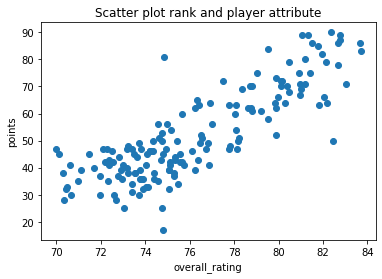

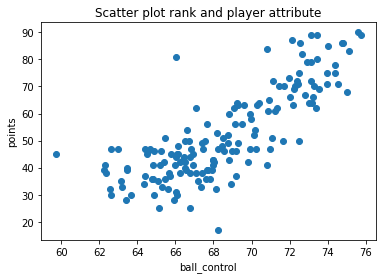

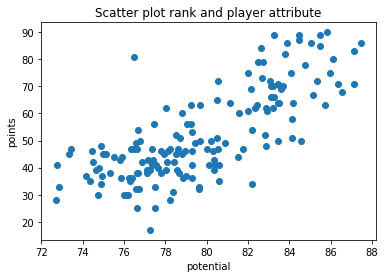

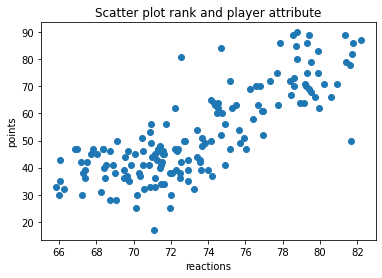

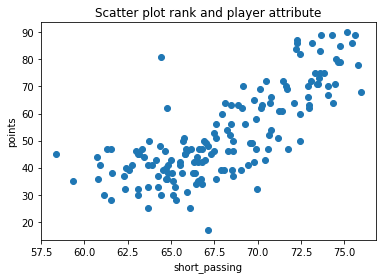

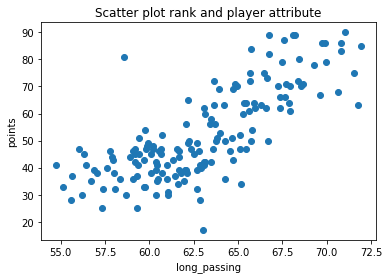

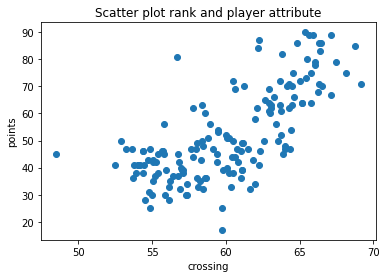

In [109]:
label = 'points'
y = df_all_mean[label]
for col in top_corr_cols:
    x = df_all_mean[col]
    plt.scatter(x,y)
    plt.title('Scatter plot rank and player attribute')
    plt.xlabel(col)
    plt.ylabel(label)
    plt.show()

From the scatter plot,***finishing, dribbling, shot_power, ball_control, positioning, crossing, and long_passes*** are the most positively correlated with ***overall_rating***

### Question 4: when is the best/peak age for a soccer player


In [66]:
# get player birthday, overall rating, and rated date
df_age = pd.read_sql('SELECT P.player_api_id, P.player_name, p.birthday, PA.date, PA.overall_rating FROM Player P JOIN Player_Attributes PA on P.player_api_id = PA.player_api_id', conn)
df_age.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   player_api_id   183978 non-null  int64  
 1   player_name     183978 non-null  object 
 2   birthday        183978 non-null  object 
 3   date            183978 non-null  object 
 4   overall_rating  183142 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 7.0+ MB


In [67]:
# drop missing overall rating
df_age.dropna(inplace=True)
df_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183142 entries, 0 to 183977
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   player_api_id   183142 non-null  int64  
 1   player_name     183142 non-null  object 
 2   birthday        183142 non-null  object 
 3   date            183142 non-null  object 
 4   overall_rating  183142 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 8.4+ MB


In [68]:
# convert object to date
df_age.birthday = pd.to_datetime(df_age.birthday)
df_age.date = pd.to_datetime(df_age.date)
df_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183142 entries, 0 to 183977
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   player_api_id   183142 non-null  int64         
 1   player_name     183142 non-null  object        
 2   birthday        183142 non-null  datetime64[ns]
 3   date            183142 non-null  datetime64[ns]
 4   overall_rating  183142 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 8.4+ MB


In [69]:
# calculate age for player at the time rated
df_age['age'] = (df_age.date - df_age.birthday).astype('timedelta64[Y]').astype(int)
df_age[['player_name','birthday','date','age','overall_rating']].head(20)

,player_name,birthday,date,age,overall_rating
0,Aaron Appindangoye,1992-02-29,2016-02-18,23,67.0
1,Aaron Appindangoye,1992-02-29,2015-11-19,23,67.0
2,Aaron Appindangoye,1992-02-29,2015-09-21,23,62.0
3,Aaron Appindangoye,1992-02-29,2015-03-20,23,61.0
4,Aaron Appindangoye,1992-02-29,2007-02-22,14,61.0
5,Aaron Cresswell,1989-12-15,2016-04-21,26,74.0
6,Aaron Cresswell,1989-12-15,2016-04-07,26,74.0
7,Aaron Cresswell,1989-12-15,2016-01-07,26,73.0
8,Aaron Cresswell,1989-12-15,2015-12-24,26,73.0
9,Aaron Cresswell,1989-12-15,2015-12-17,26,73.0


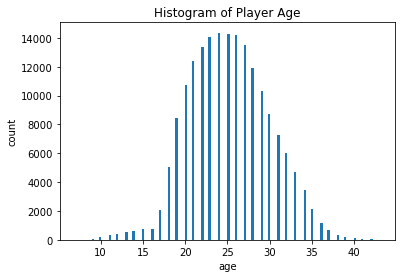

In [70]:
# see age distributed data
label = 'age'
plt.hist(df_age[label],128)
plt.xlabel(label)
plt.ylabel('count')
plt.title('Histogram of Player Age')
plt.show()

> most data from around 20 ~ 30 . so the analys of this age's range  may get the most accuracy

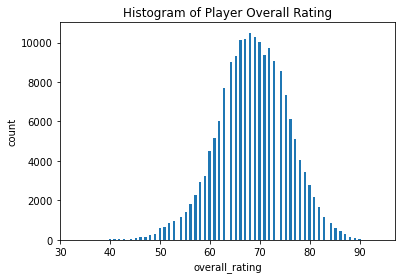

In [52]:
# see overall rating distributed
label = 'overall_rating'
plt.hist(df_age[label],128)
plt.xlabel(label)
plt.ylabel('count')
plt.title('Histogram of Player Overall Rating')
plt.show()

most data from around 60 ~ 80 

In [74]:
# remove outlier of age

df_age = remove_outlier(df_age,'age')

In [75]:
# which age is the highest overall rating of one player. rank them.
df_age['rank'] = df_age.groupby('player_api_id')['overall_rating'].rank('dense', ascending=False).astype(int)
df_age.head(20)

,player_api_id,player_name,birthday,date,overall_rating,age,rank
0,505942,Aaron Appindangoye,1992-02-29,2016-02-18,67.0,23,1
1,505942,Aaron Appindangoye,1992-02-29,2015-11-19,67.0,23,1
2,505942,Aaron Appindangoye,1992-02-29,2015-09-21,62.0,23,2
3,505942,Aaron Appindangoye,1992-02-29,2015-03-20,61.0,23,3
4,505942,Aaron Appindangoye,1992-02-29,2007-02-22,61.0,14,3
5,155782,Aaron Cresswell,1989-12-15,2016-04-21,74.0,26,1
6,155782,Aaron Cresswell,1989-12-15,2016-04-07,74.0,26,1
7,155782,Aaron Cresswell,1989-12-15,2016-01-07,73.0,26,2
8,155782,Aaron Cresswell,1989-12-15,2015-12-24,73.0,26,2
9,155782,Aaron Cresswell,1989-12-15,2015-12-17,73.0,26,2


In [76]:
# get count group by age
count_by_age = df_age.groupby('age').size()
count_by_age

age
14      600
15      722
16      738
17     2095
18     5055
19     8446
20    10732
21    12380
22    13354
23    14084
24    14356
25    14300
26    14191
27    13472
28    11900
29    10286
30     8733
31     7258
32     6018
33     4708
34     3439
35     2131
36     1137
dtype: int64

In [77]:
# filter rank number 1. because we want to know which age is the best.
df_top_rank = df_age[df_age['rank'] == 1]
df_top_rank.head()

,player_api_id,player_name,birthday,date,overall_rating,age,rank
0,505942,Aaron Appindangoye,1992-02-29,2016-02-18,67.0,23,1
1,505942,Aaron Appindangoye,1992-02-29,2015-11-19,67.0,23,1
5,155782,Aaron Cresswell,1989-12-15,2016-04-21,74.0,26,1
6,155782,Aaron Cresswell,1989-12-15,2016-04-07,74.0,26,1
11,155782,Aaron Cresswell,1989-12-15,2015-09-25,74.0,25,1


In [79]:
# count rank 1 per age
top_rank_by_age = df_top_rank.groupby('age').size()
top_rank_by_age

age
14      83
15      78
16      69
17     180
18     567
19    1286
20    1771
21    2265
22    2565
23    2833
24    2991
25    3002
26    3087
27    2791
28    2311
29    1820
30    1437
31    1009
32     671
33     486
34     265
35     160
36      77
dtype: int64

In [80]:
# we want to know percent of rank 1 on total number of data in the same age.
ratio_age_rank = top_rank_by_age / count_by_age  * 100
ratio_age_rank.dropna(inplace=True)
ratio_age_rank

age
14    13.833333
15    10.803324
16     9.349593
17     8.591885
18    11.216617
19    15.226143
20    16.502050
21    18.295638
22    19.207728
23    20.115024
24    20.834494
25    20.993007
26    21.753224
27    20.717043
28    19.420168
29    17.693953
30    16.454827
31    13.901901
32    11.149884
33    10.322855
34     7.705728
35     7.508212
36     6.772208
dtype: float64

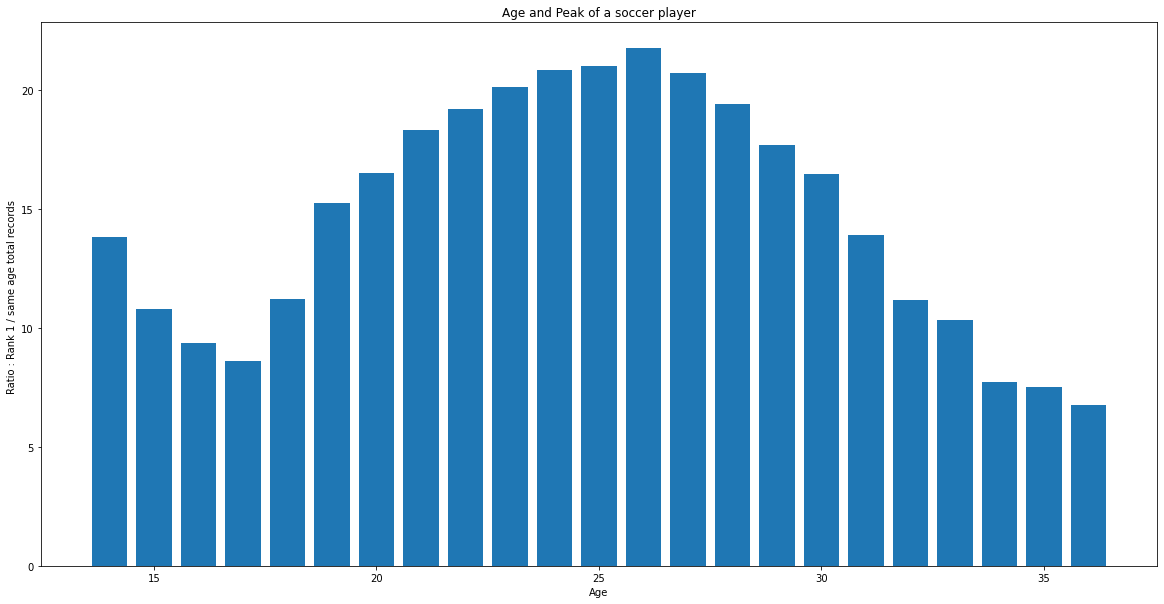

In [84]:
# bar chart
x = ratio_age_rank.index
y = ratio_age_rank.values
fig = plt.figure(figsize = (20, 10))
plt.bar(x,y)
plt.xlabel('Age')
plt.ylabel('Ratio : Rank 1 / same age total records ')
plt.title('Age and Peak of a soccer player')
plt.show()

> 26 years old is the peak of professional soccer player.

### Question 5:  In English Premier League, which team have strongest attack(scores) ?

In [85]:
index_cols = ['team_api_id','season_start_year']
df_final = pd.merge(df_all_mean.set_index(index_cols), df_goal.set_index(index_cols),left_index=True, right_index=True)
df_final = df_final.reset_index()
df_final.head()

,team_api_id,season_start_year,rank,points,team_long_name,team_short_name,preferred_foot,attacking_work_rate,defensive_work_rate,overall_rating,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,goal
0,10260,2008,1,90,Manchester United,MUN,2.0,2.205742,2.234450,82.343301,...,77.088517,54.531100,60.171053,55.366029,16.375598,26.998804,69.718900,27.273923,27.133971,68
1,8650,2008,2,86,Liverpool,LIV,2.0,2.282297,2.456938,81.504785,...,78.066986,57.912679,62.095694,59.203349,16.476077,27.260766,70.813397,27.442584,27.988038,77
2,8455,2008,3,83,Chelsea,CHE,2.0,2.265550,2.220096,83.687799,...,77.959330,57.380383,61.844498,60.021531,16.187799,27.962919,70.785885,27.623206,28.059809,68
3,9825,2008,4,72,Arsenal,ARS,2.0,2.244019,2.155502,80.101675,...,72.471292,54.144737,60.681818,61.394737,14.210526,26.354067,68.351675,26.023923,27.241627,68
4,8668,2008,5,63,Everton,EVE,2.0,2.095694,2.217703,78.066986,...,71.387560,60.533493,62.744019,60.866032,17.383971,29.191388,66.549043,28.863636,29.882775,55


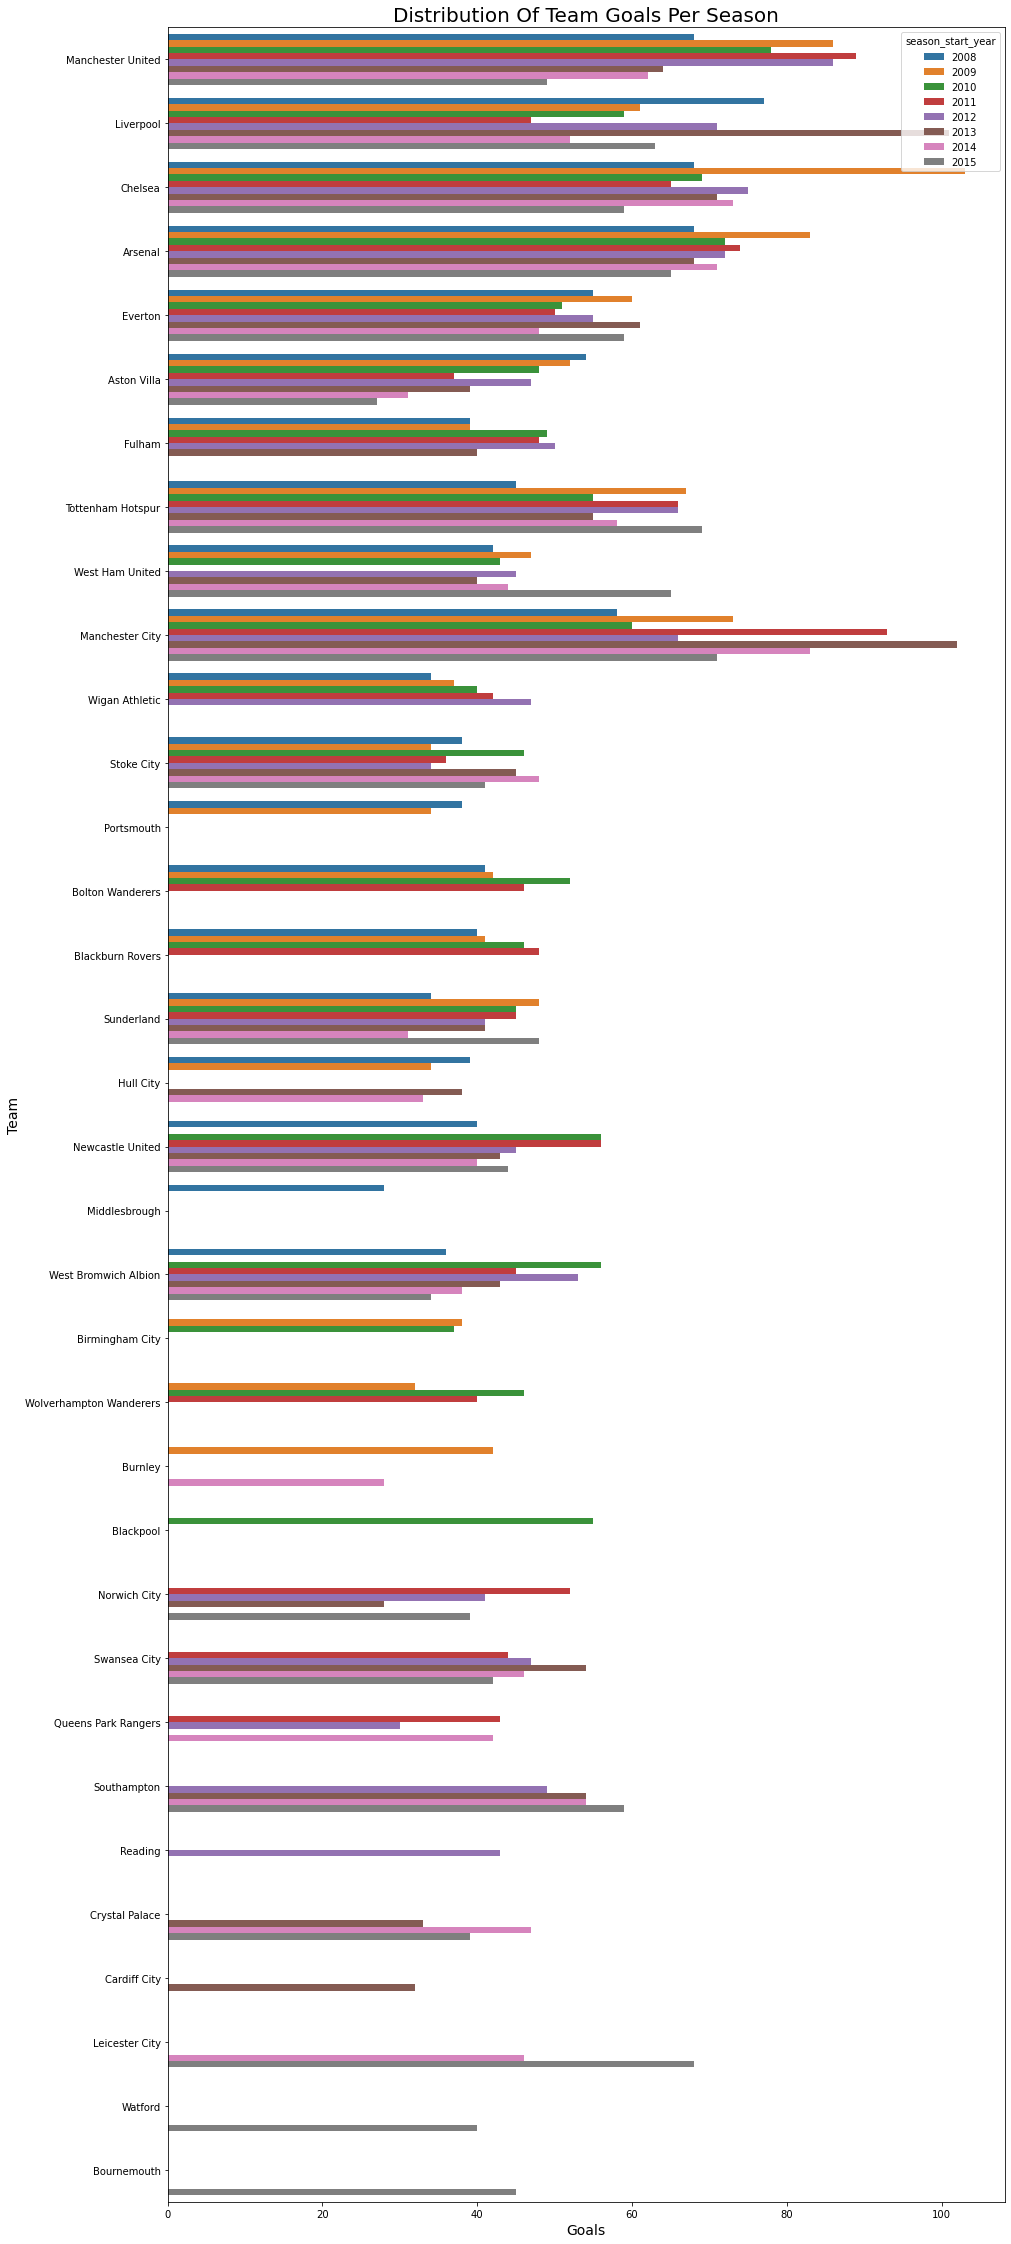

In [86]:
ax = sb.barplot(data=df_final,x='goal', y='team_long_name', hue='season_start_year')
ax.figure.set_size_inches(15, 40);
plt.xlabel('Goals', fontsize=14)
plt.ylabel('Team', fontsize=14)
plt.title("Distribution Of Team Goals Per Season", fontsize=20);

> Goals of teams per year.

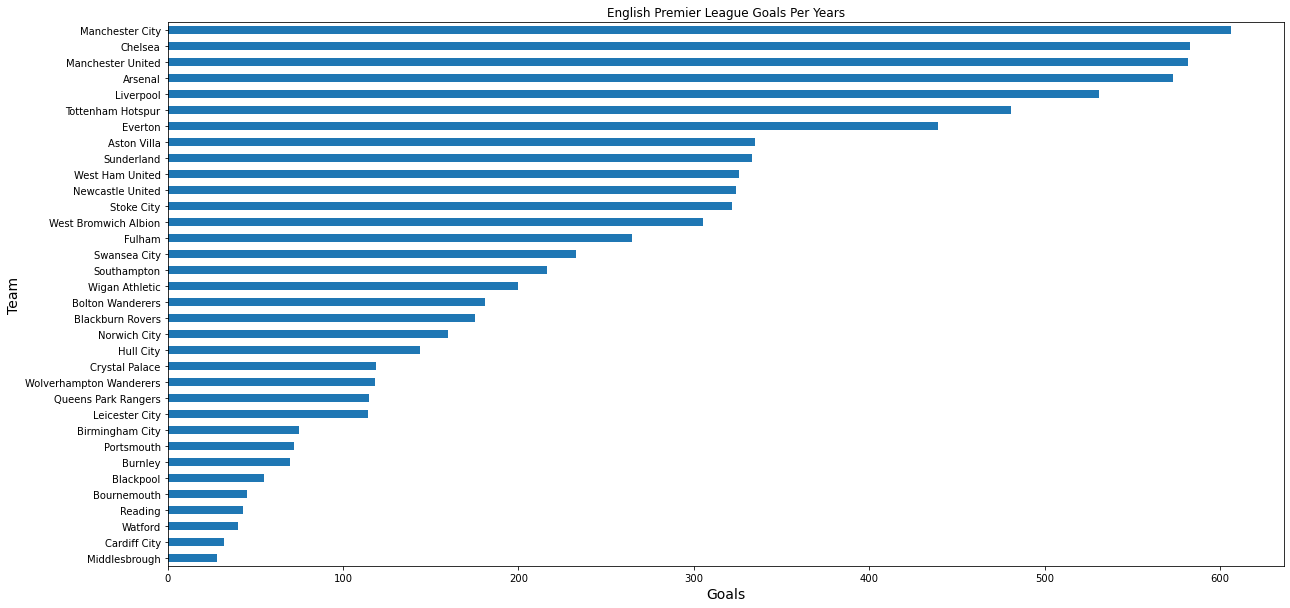

In [95]:
plt.figure(figsize = (20, 10))
df_final.groupby('team_long_name').goal.sum().sort_values().plot.barh()
plt.title('English Premier League Goals Per Years')
plt.xlabel('Goals', fontsize=14)
plt.ylabel('Team', fontsize=14)
plt.show()

> ***Manchester City*** is **the strongest** team in attacking. They scored the best.

### Question 6: In English Premier League, which team got most points ?

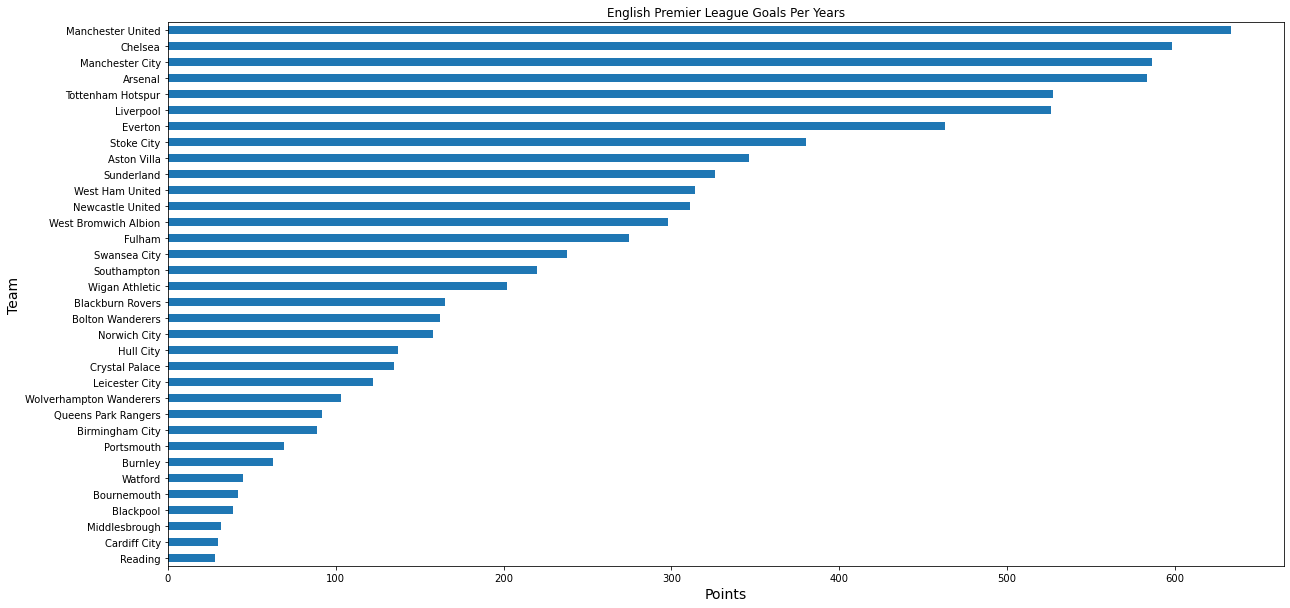

In [96]:
plt.figure(figsize = (20, 10))
df_final.groupby('team_long_name').points.sum().sort_values().plot.barh()
plt.title('English Premier League Goals Per Years')
plt.xlabel('Points', fontsize=14)
plt.ylabel('Team', fontsize=14)

plt.show()

> ***Manchester United*** is the team that got the **most points**.

### Question 7: Which season in English Premier League has the most goals ?

Text(0.5, 1.0, 'English Premier League Goals Per Years')

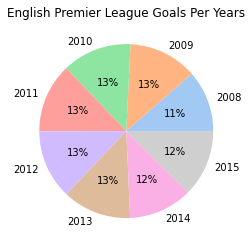

In [88]:
colors = sb.color_palette('pastel')[0:30]
series = df_final.groupby('season_start_year').goal.sum().sort_index()
plt.pie(series,labels=series.index, colors = colors ,autopct='%.0f%%')
plt.title('English Premier League Goals Per Years')

> The goals per year not changed much.

Text(0, 0.5, 'Goals')

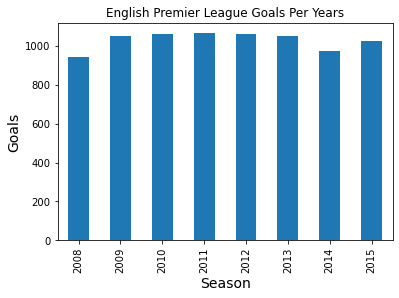

In [94]:
df_final.groupby('season_start_year').goal.sum().sort_index().plot.bar()
plt.title('English Premier League Goals Per Years')
plt.xlabel('Season', fontsize=14)
plt.ylabel('Goals', fontsize=14)

In [97]:
df_final.groupby('season_start_year').goal.sum().sort_values()

season_start_year
2008     942
2014     975
2015    1026
2013    1052
2009    1053
2010    1063
2012    1063
2011    1066
Name: goal, dtype: int64

> 2011 is the season with highest goals scored.

<a id='conclusions'></a>
## Conclusions

### Limitations
There are some limitations listed below that impace the result and performance of the analysis tasks:

> I found that the players' names are duplicated a lot so I had to remove all of the duplicates when I did already EDA processes with that table considereing that it didn't affect the analysis accuracy

> I found that there were huge number of missing values in the player_attributes table which I dropped them not to negatively affect the analysis

> finding some missing values while creating a set of heights and heading properties of the players, so I removed them 

> Some teams only played in English Premier League one or two seasons, so the goals/points summary for this teams are not accuracy.
> Some player attributes missing.
> some columns about event of match have html tag
> with little documentation about the dataset , it is hard to choose column to analyis.

### Summary 
> There are converging between the most penalties had by the players i.e, the most 20 players had penalties in a range of 96 to 93 penalty. By the way, we found out that **Rickie Lambert**, **Mario Balotelli**, **Xavi Hernandez**, and **Andrea Pirlo** are the most penalty-having in general.

> **finishing**,**dribbling**,**shot_power**,**ball_control**,**positioning**,**crossing**, and **long_passes** are the most positively correlated with overall_rating of players in general and I believe that this is logical because they are all essential attrubites which have a big effect on the result of the match as well as player's rating in that match 
> There is no correlation between the heading and the height of the players which means that its not necessary for being good-header is to be tall! It is now normal and clear that we could say that the disrtibution of the heights over the teams is exactly normal distribution which means teams don't tend to sign tall players

> all attributes above are belongs to midfield player, so maybe midfield is the most important ( ofcourse balance of the team is important too )
> 26 is the peak of a player. Afer this age almost players overall will be decrease.
> Manchester City is the team scored more goals than all other teams in English Premier League.
> Manchester United is the team got more points than all other teams in English Premier League.
> 2011 is the season with highest goals scored



## Reference Links
* GEEKSFORGEEKS - Bar Plot Matplotlib (https://www.geeksforgeeks.org/bar-plot-in-matplotlib/)
* GEEKSFORGEEKS - Seaborn Distribution plots (https://www.geeksforgeeks.org/seaborn-distriution-plots/)
* Accessing SQLite Databases Using Python and Pandas (https://datacarpentry.org/python-ecology-lesson/09-working-with-sql/index.html)
* sqlitedict 2.0.0 (https://pypi.org/project/sqlitedict?s=09)